# EXERCISE-1

## 1. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 3\\diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Compute mean & standard deviation, tabulate and visualize the age of the patients

In [5]:
df["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [6]:
asum=np.sum(df["Age"])
acount=df["Age"].shape[0]
amean=asum/acount
print(f"Mean of Age is {amean}")

Mean of Age is 33.240885416666664


In [7]:
adev=np.std(df["Age"])
print(f"Standard deviation of Age is {adev}")

Standard deviation of Age is 11.752572645994178


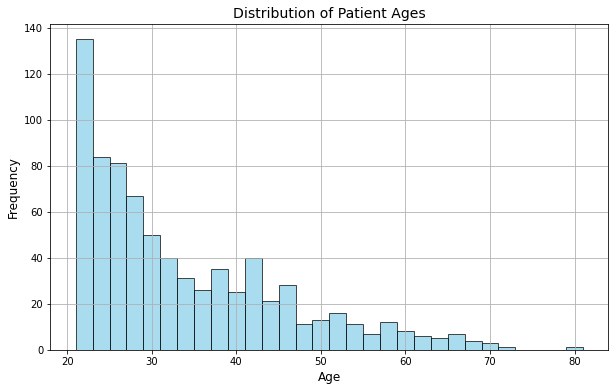

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Patient Ages', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

## 3. Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

In [9]:
abctab=pd.crosstab(df["Age"],df["BMI"])
print(abctab)

BMI  0.0   18.2  18.4  19.1  19.3  19.4  19.5  19.6  19.9  20.0  ...  49.6  \
Age                                                              ...         
21      3     2     0     1     0     0     0     0     0     0  ...     0   
22      2     0     0     0     0     1     0     0     0     1  ...     0   
23      0     0     0     0     0     0     0     0     0     0  ...     0   
24      1     0     0     0     0     0     0     0     0     0  ...     0   
25      1     0     0     0     0     0     1     1     0     0  ...     0   
26      1     0     0     0     0     0     0     0     0     0  ...     1   
27      0     1     1     0     0     0     0     0     0     0  ...     0   
28      0     0     0     0     0     0     1     0     1     0  ...     0   
29      0     0     0     0     0     0     0     0     0     0  ...     0   
30      1     0     0     0     1     0     0     0     0     0  ...     0   
31      0     0     0     0     0     0     0     0     0     0 

In [10]:
abcorr=df["Age"].corr(df["BMI"])
print(abcorr)

0.03624187009229415


In [11]:
age_bmi_class_stats = df.groupby('Outcome')[['Age', 'BMI']].agg(['mean', 'std', 'min', 'max'])
print(age_bmi_class_stats)

               Age                           BMI                     
              mean        std min max       mean       std  min   max
Outcome                                                              
0        31.190000  11.667655  21  81  30.304200  7.689855  0.0  57.3
1        37.067164  10.968254  21  70  35.142537  7.262967  0.0  67.1


## 4. Tabulate the class label and comment on whether the classes are balanced. 

0    500
1    268
Name: Outcome, dtype: int64


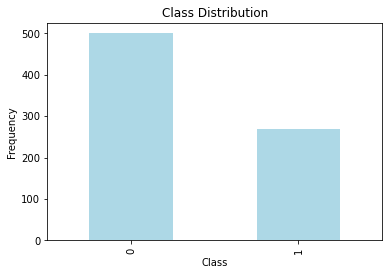

In [12]:
class_distribution = df['Outcome'].value_counts()
print(class_distribution)
class_distribution.plot(kind='bar', color='lightblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## 5. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 6. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

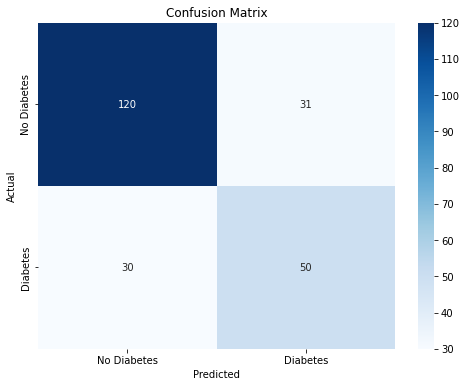

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 7.  Compute accuracy rate, true positive and true negative rate and comment on the performance

In [15]:
TP = cm[1, 1]  
TN = cm[0, 0]  
FP = cm[0, 1]  
FN = cm[1, 0]  
TPR = TP / (TP + FN)  
TNR = TN / (TN + FP)
accuracy = accuracy_score(y_test, y_pred)

print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"True Negative Rate (TNR): {TNR:.2f}")

True Positive (TP): 50
True Negative (TN): 120
False Positive (FP): 31
False Negative (FN): 30
Accuracy: 0.74
True Positive Rate (TPR): 0.62
True Negative Rate (TNR): 0.79


## 8. Visualize the ROC curve, and comment on the performance of the classifier.

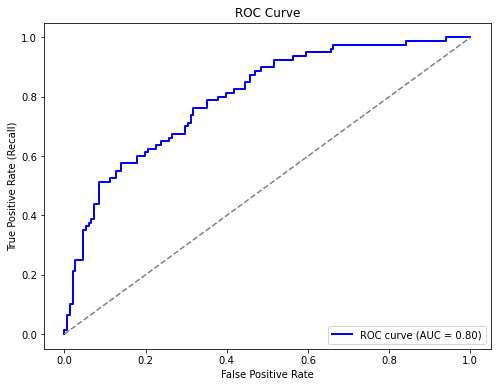

In [16]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.show()

### An AUC of 0.80 is a solid result for a classification task. While it’s not perfect, it indicates the model has a good predictive capability. AUC of 0.80 implies that there’s an 80% chance that the model will correctly rank a randomly chosen positive instance (diabetic) higher than a randomly chosen negative instance (non-diabetic).

# EXERCISE-2

In [17]:
db=pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 3\\Iris.csv")
db.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 1. For the IRIS data set write down the meta information.

In [18]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
db.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 2. Visualize the class label against the predictor variable using appropriate plots. 

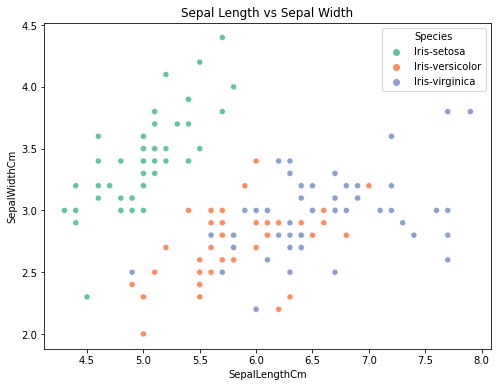

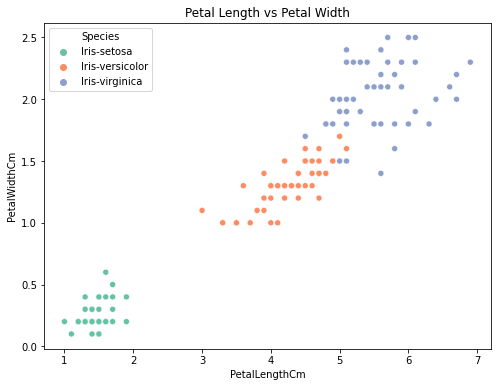

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=db['SepalLengthCm'], y=db['SepalWidthCm'], hue=db['Species'], palette='Set2')
plt.title('Sepal Length vs Sepal Width')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=db['PetalLengthCm'], y=db['PetalWidthCm'], hue=db['Species'], palette='Set2')
plt.title('Petal Length vs Petal Width')
plt.show()

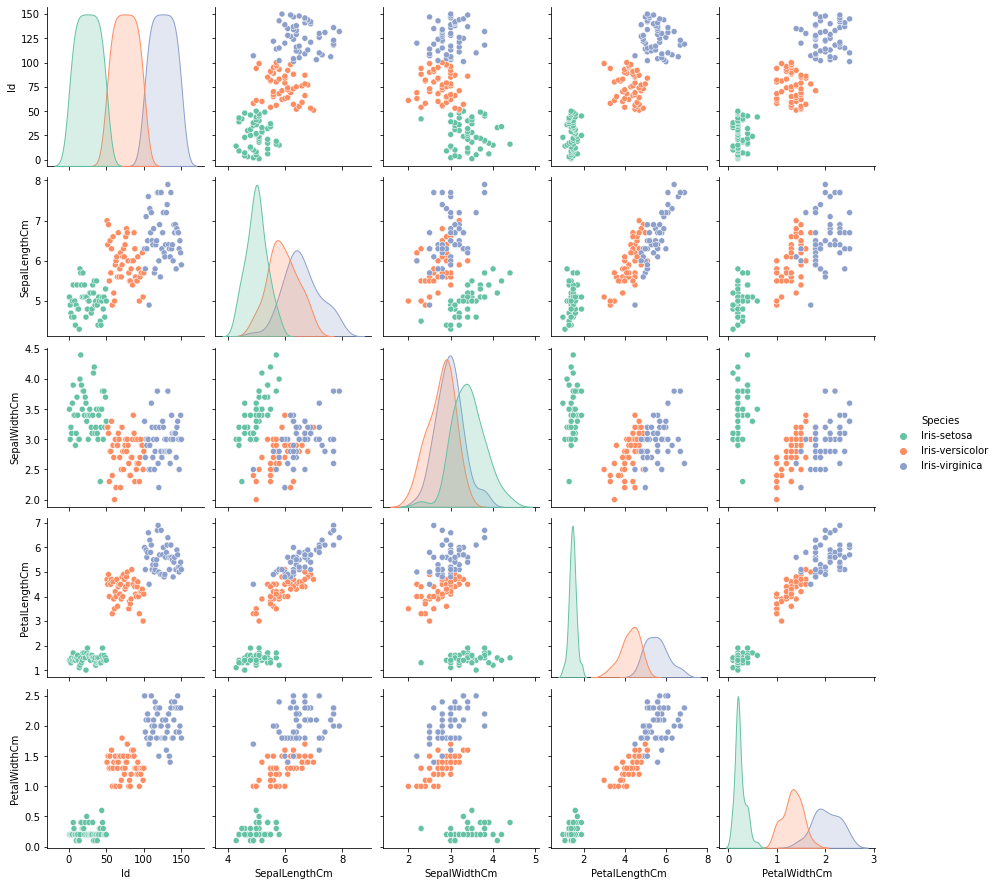

In [21]:
sns.pairplot(db, hue='Species', palette='Set2')
plt.show()

## 3. Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label ‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X = db.drop(['Id', 'Species'], axis=1)  
y = db['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

log_reg_model = LogisticRegression(max_iter=200)

log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)

## 4. Analysis and visualize the performance of the classifier using metrics, confusion matrix. 

Accuracy of Logistic Regression: 1.00


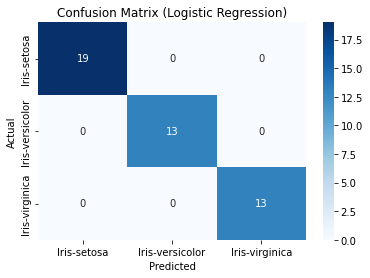

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [23]:

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Accuracy of Logistic Regression: {accuracy_log_reg:.2f}')

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=db['Species'].unique(), yticklabels=db['Species'].unique())
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_log_reg))

## 5. Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for k value between 2 and 20. Divide the dataset into training and test set  (70,30) using train_test_split method in sklearn. 

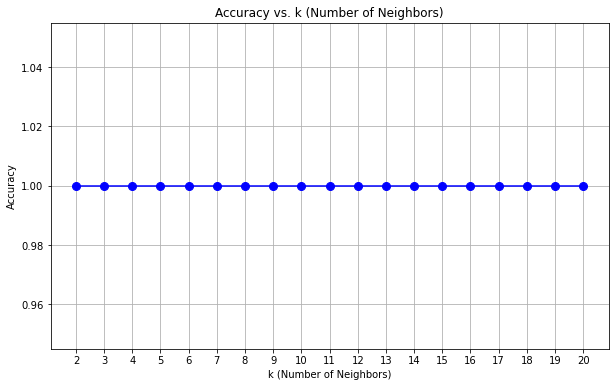

k = 2: Accuracy = 1.0000
k = 3: Accuracy = 1.0000
k = 4: Accuracy = 1.0000
k = 5: Accuracy = 1.0000
k = 6: Accuracy = 1.0000
k = 7: Accuracy = 1.0000
k = 8: Accuracy = 1.0000
k = 9: Accuracy = 1.0000
k = 10: Accuracy = 1.0000
k = 11: Accuracy = 1.0000
k = 12: Accuracy = 1.0000
k = 13: Accuracy = 1.0000
k = 14: Accuracy = 1.0000
k = 15: Accuracy = 1.0000
k = 16: Accuracy = 1.0000
k = 17: Accuracy = 1.0000
k = 18: Accuracy = 1.0000
k = 19: Accuracy = 1.0000
k = 20: Accuracy = 1.0000


In [24]:
from sklearn.neighbors import KNeighborsClassifier
accuracies = []
for k in range(2, 21):
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), accuracies, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Accuracy vs. k (Number of Neighbors)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()    

for k, accuracy in zip(range(2, 21), accuracies):
    print(f'k = {k}: Accuracy = {accuracy:.4f}')

## 6. Identify the best k (for k between 2 and 20) for the model built.

### Best value for k is 2 according to the results as everything is 1

## 7. Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better performance for the IRIS dataset.

Accuracy of KNN (k=2): 1.00


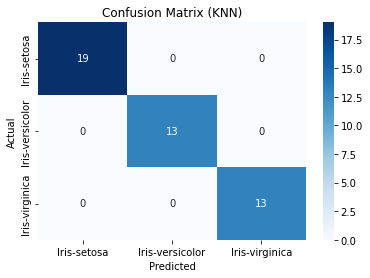

KNN Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Logistic Regression Accuracy: 1.00
KNN Accuracy (Best k=2): 1.00


In [28]:
best_k=2
knn_best_model = KNeighborsClassifier(n_neighbors=best_k)
knn_best_model.fit(X_train, y_train)
y_pred_knn_best = knn_best_model.predict(X_test)

accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print(f'Accuracy of KNN (k={best_k}): {accuracy_knn_best:.2f}')
cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)
sns.heatmap(cm_knn_best, annot=True, fmt='d', cmap='Blues', xticklabels=db['Species'].unique(), yticklabels=db['Species'].unique())
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_best))

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
print(f"KNN Accuracy (Best k={best_k}): {accuracy_knn_best:.2f}")

### Logistic Regression and K-Nearest Neighbors (KNN) both performed excellently on the Iris dataset with 100% accuracy.
### There is no need to choose one over the other in this case since both models yield the same perfect performance.
### However, in more complex or noisy datasets, further model tuning (e.g., hyperparameter tuning for KNN or regularization for Logistic Regression) would be necessary to evaluate the models' true capabilities.